In [1]:
import os

import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import numpy as np
import copy

from transforms3d.euler import euler2mat, mat2euler

In [2]:
os.chdir('../run/')

In [3]:
import amc_parser

###  Test parsing

parsing ../data/02/02.asf
parsing ../data/02/02_01.amc


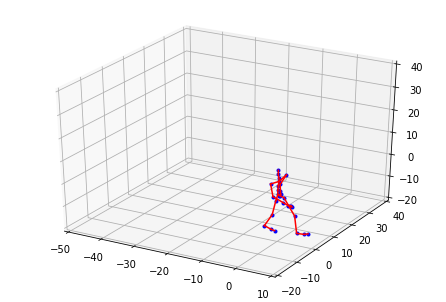

parsing ../data/05/05.asf
parsing ../data/05/05_01.amc


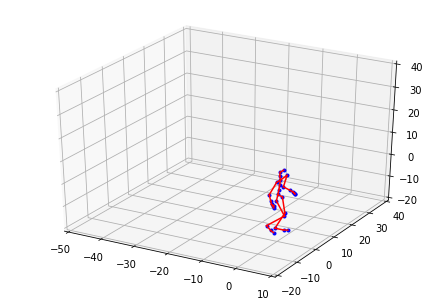

parsing ../data/06/06.asf
parsing ../data/06/06_01.amc


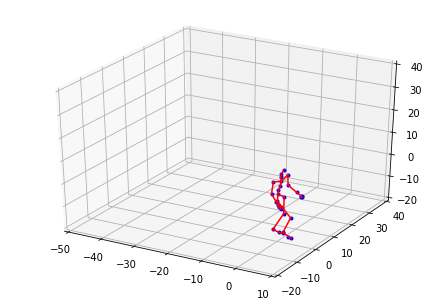

parsing ../data/07/07.asf
parsing ../data/07/07_01.amc


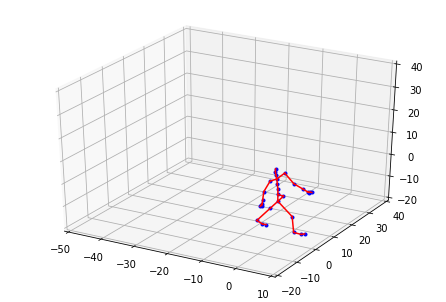

parsing ../data/08/08.asf
parsing ../data/08/08_01.amc


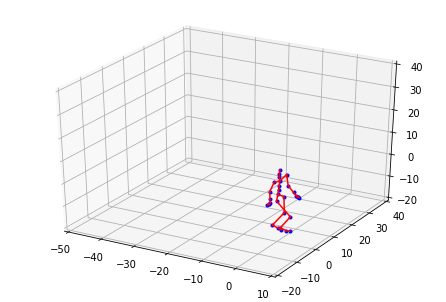

parsing ../data/10/10.asf
parsing ../data/10/10_04.amc


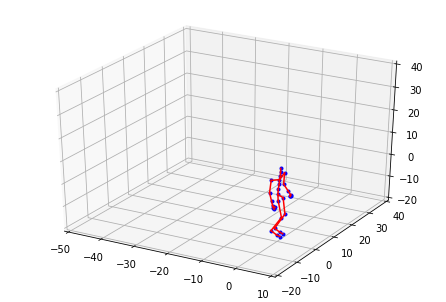

parsing ../data/12/12.asf
parsing ../data/12/12_01.amc


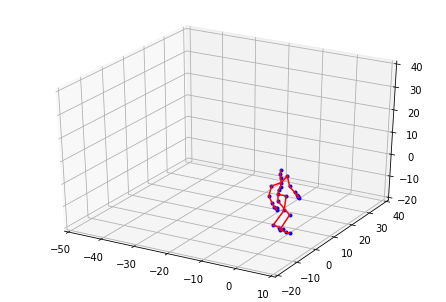

parsing ../data/16/16.asf
parsing ../data/16/16_15.amc


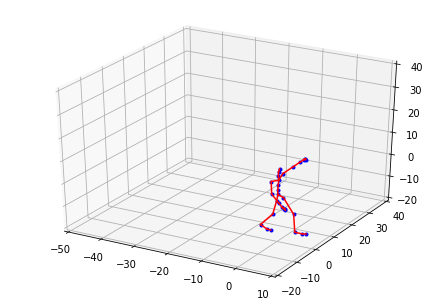

parsing ../data/26/26.asf
parsing ../data/26/26_01.amc


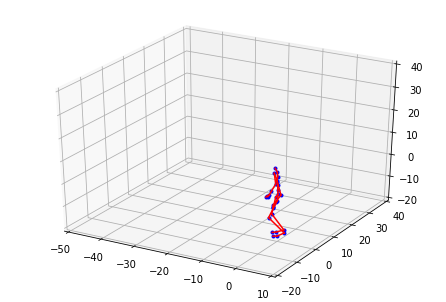

parsing ../data/27/27.asf
parsing ../data/27/27_01.amc


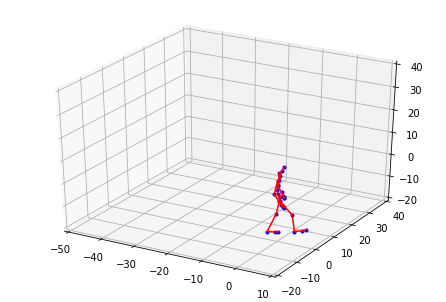

parsing ../data/29/29.asf
parsing ../data/29/29_01.amc


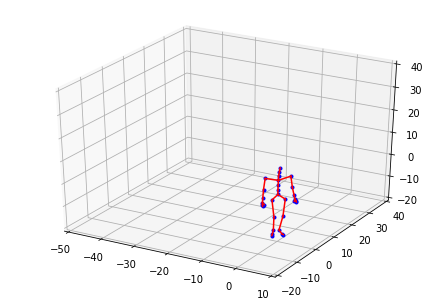

parsing ../data/32/32.asf
parsing ../data/32/32_01.amc


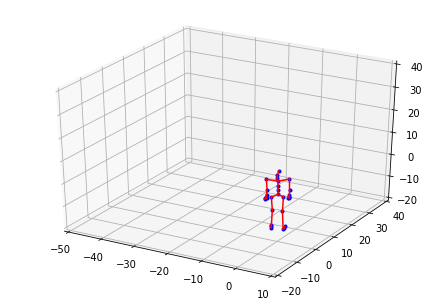

parsing ../data/35/35.asf
parsing ../data/35/35_01.amc


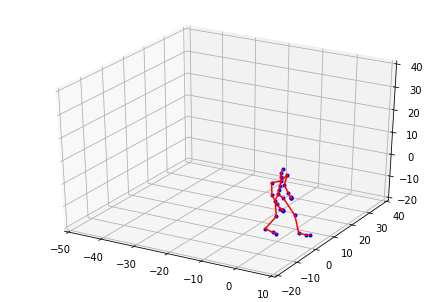

parsing ../data/37/37.asf
parsing ../data/37/37_01.amc


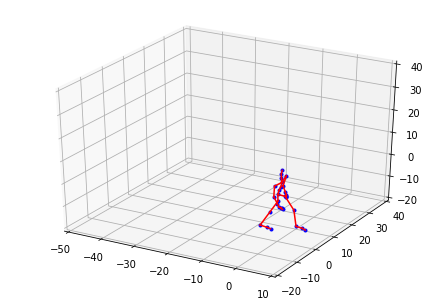

parsing ../data/38/38.asf
parsing ../data/38/38_01.amc


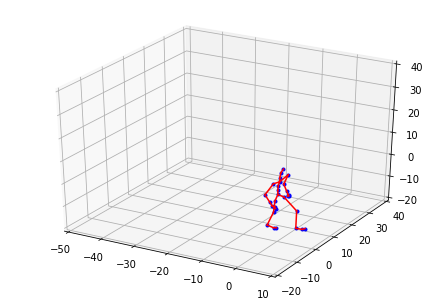

parsing ../data/39/39.asf
parsing ../data/39/39_01.amc


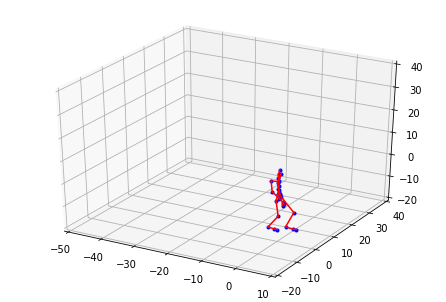

parsing ../data/43/43.asf
parsing ../data/43/43_01.amc


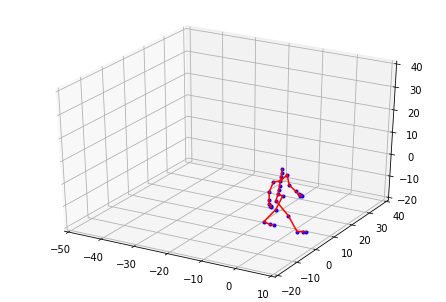

parsing ../data/46/46.asf
parsing ../data/46/46_01.amc


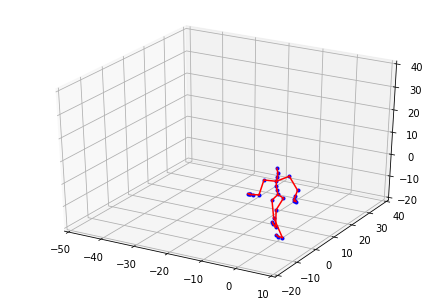

parsing ../data/49/49.asf
parsing ../data/49/49_01.amc


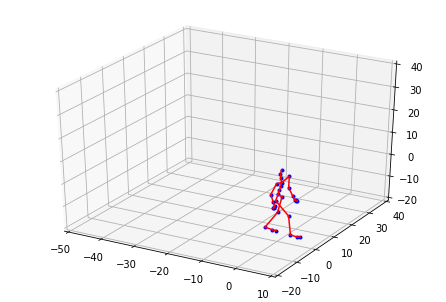

parsing ../data/55/55.asf
parsing ../data/55/55_04.amc


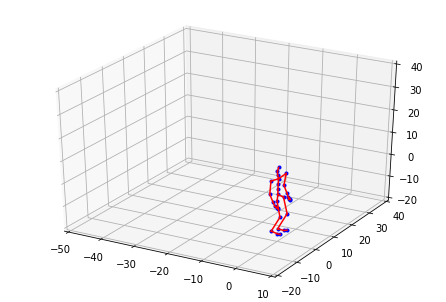

In [4]:
joints, motions = amc_parser.test_all()

### Parse and save to dataframe one person data

In [4]:
df = amc_parser.get_all_data(person_folder='../data/05/')

05_01.amc


In [5]:
df.head()

,rtibia_coord_0,rtibia_coord_1,rtibia_coord_2,rtibia_norm_coord_0,rtibia_norm_coord_1,rtibia_norm_coord_2,rtibia_angle_0,rtibia_angle_1,rtibia_angle_2,rtibia_norm_angle_0,...,rthumb_motion_1,rclavicle_motion_0,rclavicle_motion_1,lfingers_motion_0,lowerback_motion_0,lowerback_motion_1,lowerback_motion_2,frame,amc_path,person
0,-0.329253,2.479765,-37.209551,-1.341793,-14.044135,-2.388851,0.679573,-0.216034,0.293101,0.461267,...,-12.5722,5.864150e-15,-2.067360e-14,7.12502,-4.15803,1.025890,-1.586270,0,05_01.amc,05
0,-0.314763,2.350177,-36.807881,-1.346403,-14.161823,-2.079681,0.645436,-0.210466,0.300014,0.424102,...,-12.8147,-2.246270e-14,2.544440e-14,7.12502,-4.38382,0.924664,-1.553710,1,05_01.amc,05
0,-0.290129,2.229188,-36.400262,-1.337639,-14.278112,-1.780862,0.614111,-0.201166,0.307332,0.400919,...,-13.0952,-1.316950e-14,-8.746530e-15,7.12502,-3.71868,1.022210,-1.117050,2,05_01.amc,05
0,-0.259766,2.117858,-35.999117,-1.292696,-14.393442,-1.446717,0.584121,-0.185261,0.316856,0.372538,...,-12.8150,5.466580e-16,1.828820e-14,7.12502,-3.85822,0.334025,-1.429720,3,05_01.amc,05
0,-0.252840,2.000910,-35.565330,-1.315840,-14.504790,-1.142730,0.548716,-0.177288,0.322326,0.342609,...,-12.6941,2.236330e-14,-1.073440e-14,7.12502,-3.79754,0.781180,-0.919431,4,05_01.amc,05


## Walking Phases

lfoot_coord_2 - направление движения человека
rfoot_coord_0 - ширина шага
rfoot_coord_1 - высота подъема

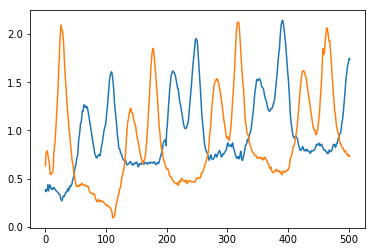

In [234]:
d = df[df['amc_path'] == '05_01.amc']
plt.plot(d['frame'], d['lfoot_coord_1'])
plt.plot(d['frame'], d['rfoot_coord_1'])

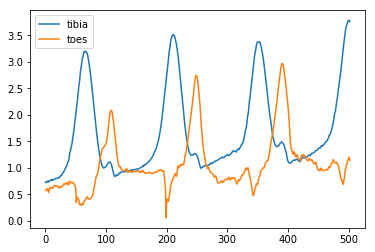

In [239]:
plt.plot(d['frame'], d['ltibia_coord_1'], label='tibia')
plt.plot(d['frame'], d['ltoes_coord_1'], label='toes')
plt.legend(loc=2)

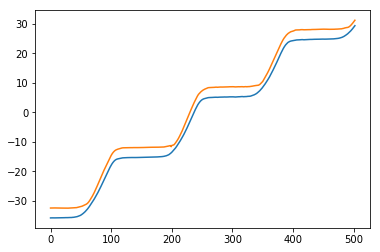

In [251]:
plt.plot(d['frame'], d['ltibia_coord_2'], label='tibia')
plt.plot(d['frame'], d['ltoes_coord_2'], label='toes')

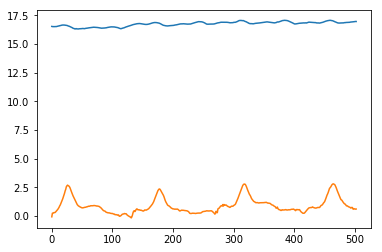

In [250]:
plt.plot(d['frame'], d['root_coord_1'])
plt.plot(d['frame'], d['rtoes_coord_1'])

чтобы получить размеры из данных amc - необходимо значнеие поделить 0.45 и умножить на 2.54 (т.е. перевести из дюймов в сантиметры)


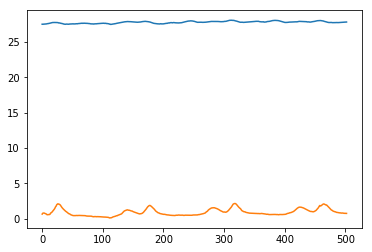

In [7]:
plt.plot(d['frame'], d['head_coord_1'])
plt.plot(d['frame'], d['rfoot_coord_1'])

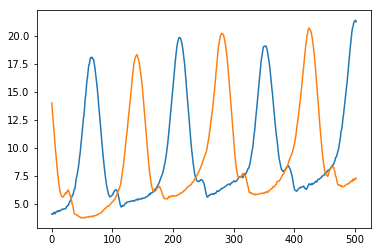

In [8]:
plt.plot(d['frame'], d['ltibia_coord_1']/0.45*2.54)
plt.plot(d['frame'], d['rtibia_coord_1']/0.45*2.54)

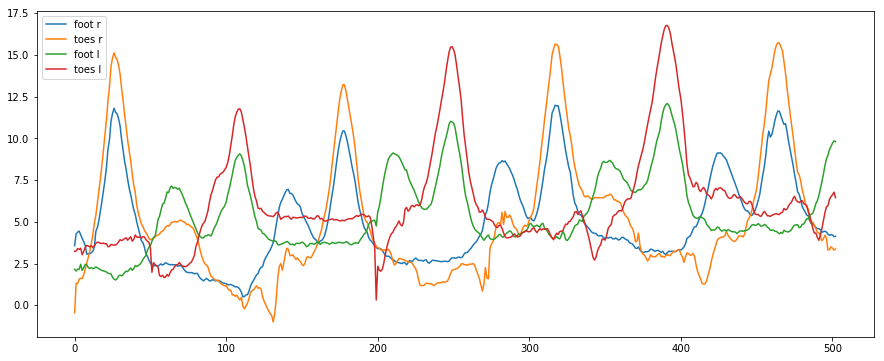

In [9]:
plt.figure(figsize=(15, 6))
plt.plot(d['frame'], d['rfoot_coord_1']/0.45*2.54, label='foot r')
plt.plot(d['frame'], d['rtoes_coord_1']/0.45*2.54, label='toes r')

plt.plot(d['frame'], d['lfoot_coord_1']/0.45*2.54, label='foot l')
plt.plot(d['frame'], d['ltoes_coord_1']/0.45*2.54, label='toes l')

plt.legend(loc=2)

### Create target

In [34]:
import plotly.plotly as py
import plotly.graph_objs as go

для каждого amc файла

In [10]:
d = df[df['amc_path'] == '05_01.amc']

дальше - функции,а потом будет их запуск для визуализации 

In [377]:
# класс создания целевых меток (разметки фаз)
class CreateTarget():
    
    
    def __init__(self, win=10, der_thr=0.1):
        
        self.win = win
        self.der_thr = der_thr
        
        
    def get_derivative(self, d, col, win, thr):

        df = pd.DataFrame(d[col])
        d_final = d.copy(deep=True)

        for i in range(1, win + 1):
            df['diff_' + str(i)] = df[col].diff(i)
        cols = df.columns.tolist()
        cols.remove(col)
        df['med_diff'] = df[cols].median(axis=1)
        df['monoton'] = 0
        df.loc[df['med_diff'] > thr, 'monoton'] = 1
        df.loc[df['med_diff'] < -thr, 'monoton'] = -1

        # smooth
        df['monoton_shift_1'] = df['monoton'].shift(1)
        df['monoton_shift_-1'] = df['monoton'].shift(-1)
        df['monoton_corr'] = df['monoton']
        df.loc[df['monoton_shift_1'] == df['monoton_shift_-1'], 'monoton_corr'] = \
            df.loc[df['monoton_shift_1'] == df['monoton_shift_-1'], 'monoton_shift_-1']

        d_final[col + '_monot'] = df['monoton_corr']

        return d_final
    
    
    def smooth_phases(self, l_ones, min_v, max_v):
        
        """
        Smooth frames (fill holes if hole is greater than min_v and less than max_v)
        """
        
        all_frames = []
        prev = [l_ones[0]]
        l_diff = [l_ones[i] - l_ones[i - 1] for i in range(1, len(l_ones))]

        for i in range(len(l_diff)):

            el = l_diff[i]
            if el > min_v and el < max_v:
                new_vals = list(np.arange(l_ones[i], l_ones[i + 1] + 1)) 
                prev.extend(new_vals)
            elif el == min_v:
                prev.append(l_ones[i + 1])
            else:
                all_frames.extend(prev)
                prev = [l_ones[i + 1]]        
        all_frames.extend(prev)
        
        return all_frames
    
    
    def map_one_leg(self, d, base_foot, plot=False):
        
        d_final = d.copy(deep=True)
        
        if base_foot == 'l':
            base_foot_col = 'lfoot_coord_1'
            base_toes_col = 'ltoes_coord_1'
            base_tibia_col = 'ltibia_coord_1'
        else:
            base_foot_col = 'rfoot_coord_1'
            base_toes_col = 'rtoes_coord_1'  
            base_tibia_col = 'rtibia_coord_1'          
            
        d_final = self.get_derivative(d_final, col=base_foot_col, win=self.win, thr=self.der_thr)
        d_final = self.get_derivative(d_final, col=base_toes_col, win=self.win, thr=self.der_thr)
        d_final = self.get_derivative(d_final, col=base_tibia_col, win=self.win, thr=self.der_thr)
        
        # heel strike
        d_final['heel_strike_' + base_foot] = 0
        d_final.loc[
            (d_final[base_toes_col] > d_final[base_foot_col]) &
            (d_final[base_toes_col +  "_monot"] == -1) & 
            (d_final[base_foot_col +  "_monot"] == -1), 
        'heel_strike_' + base_foot] = 1

        # toe off
        d_final['toe_off_' + base_foot] = 0
        d_final.loc[
            (d_final[base_tibia_col] > d_final[base_foot_col]) &
            (d_final[base_toes_col +  "_monot"] >= 0) & 
            (d_final[base_foot_col +  "_monot"] >= 0) &
            (d_final[base_tibia_col +  "_monot"] == 1) , 
        'toe_off_' + base_foot] = 1
        
        # smooth
        col = 'toe_off_' + base_foot
        l_ones = d_final[d_final[col] == 1].frame.tolist()
        fr_all = self.smooth_phases(l_ones, min_v=1, max_v=50)
        d_final.loc[d_final['frame'].isin(fr_all), col] = 1
        d_final['phases_' + base_foot] = None
        d_final.loc[d_final['toe_off_' + base_foot] == 1, 'phases_' + base_foot] = 'toe_off'
        d_final.loc[d_final['heel_strike_' + base_foot] == 1, 'phases_' + base_foot] = 'heel_strike'
        
        
        if plot:
            plt.figure(figsize=(15, 9))
            plt.plot(d_final['frame'], d_final[base_foot_col]/0.45*2.54, label='foot')
            plt.plot(d_final['frame'], d_final[base_foot_col +  "_monot"], label='foot monot')
            plt.plot(d_final['frame'], d_final[base_toes_col]/0.45*2.54, label='toes')
            plt.plot(d_final['frame'], d_final[base_toes_col +  "_monot"] - 5, label='toes monot')
            plt.plot(d_final['frame'], d_final[base_tibia_col]/0.45*2.54, label='tibia')
            plt.plot(d_final['frame'], d_final[base_tibia_col +  "_monot"] - 10, label='tibia monot')
            plt.plot(d_final['frame'], d_final['heel_strike_' + base_foot] * (-15), label='heel_strike')
            plt.plot(d_final['frame'], d_final['toe_off_' + base_foot] * (-20), label='toe_off')
            plt.title('Mapping for {} leg'.format(base_foot))
            plt.legend(loc=2)
                
        return d_final
    
    
    def evaluate(self, d, plot=False):
        
        # get heel strike | toe off labels for each leg
        base_foot = 'l'
        d_l = self.map_one_leg(d, base_foot=base_foot, plot=plot)
        d_l = d_l[['heel_strike_' + base_foot, 'toe_off_' + base_foot, 'phases_' + base_foot, 'frame']]
        d = pd.merge(d, d_l, left_on='frame', right_on='frame')
        
        base_foot = 'r'
        d_r = self.map_one_leg(d, base_foot=base_foot, plot=plot)
        d_r = d_r[['heel_strike_' + base_foot, 'toe_off_' + base_foot, 'phases_' + base_foot, 'frame']]
        d = pd.merge(d, d_r, left_on='frame', right_on='frame')  
        
        
        # get single support
        d['support'] = None
        d.loc[d['ltibia_coord_1'] > d['rtibia_coord_1'], 'support'] = 'lss'
        d.loc[d['ltibia_coord_1'] < d['rtibia_coord_1'], 'support'] = 'rss'
        d.loc[~d['phases_r'].isnull(), 'support'] = 'ds'
        d.loc[~d['phases_l'].isnull(), 'support'] = 'ds'
        d.loc[d['support'] == 'ds', 'support_cat'] = 0
        d.loc[d['support'] == 'lss', 'support_cat'] = 1
        d.loc[d['support'] == 'rss', 'support_cat'] = -1
        
        if plot:
            plt.figure(figsize=(15, 9))
            plt.plot(d['frame'], d['ltoes_coord_1']/0.45*2.54, label='toes l')
            plt.plot(d['frame'], d['ltibia_coord_1']/0.45*2.54, label='tibia l')
            plt.plot(d['frame'], d['rtoes_coord_1']/0.45*2.54, label='toes r')
            plt.plot(d['frame'], d['rtibia_coord_1']/0.45*2.54, label='tibia r')
            plt.plot(d['frame'], d['support_cat'] , label='support')
            plt.title('Support: 0 - double support, 1 - left leg single support, -1 - right leg single support')
            plt.legend(loc=2)
            
        return d
    

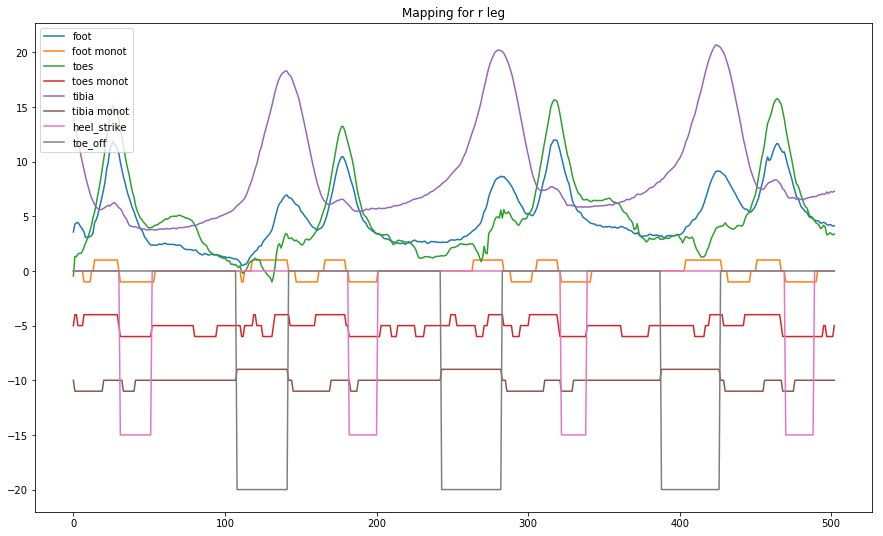

In [378]:
cr_target = CreateTarget(win=10, der_thr=0.1)
d1 = cr_target.map_one_leg(d, base_foot='r', plot=True)

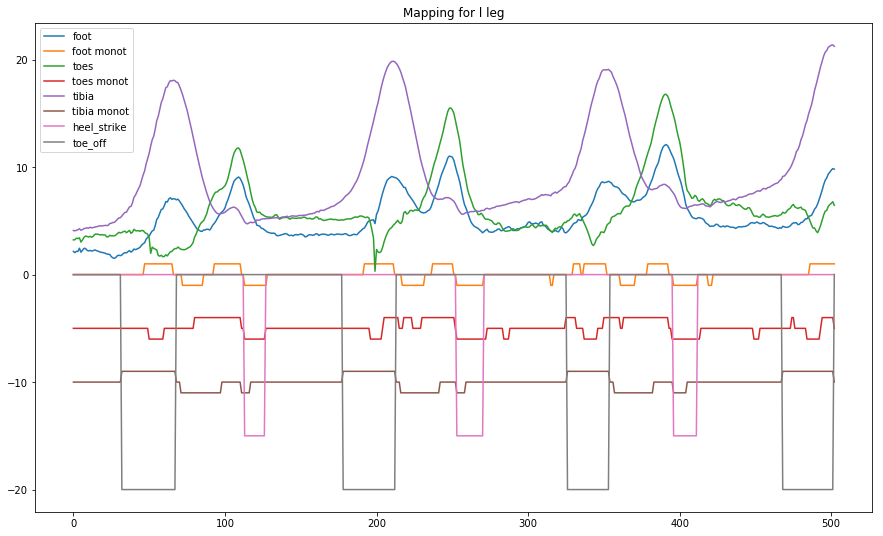

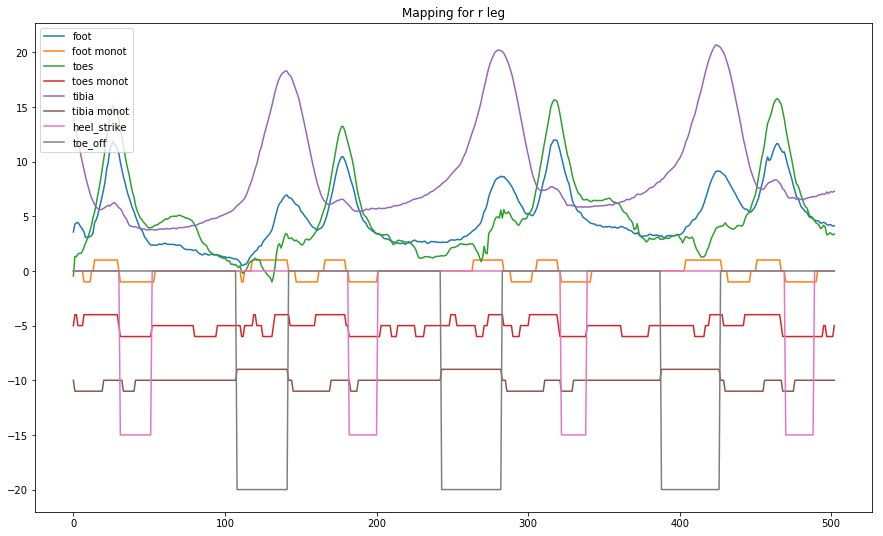

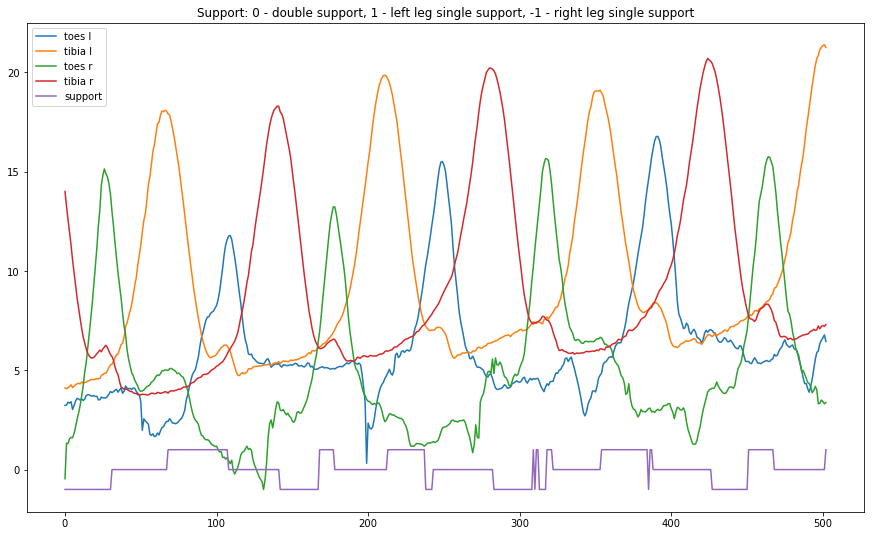

In [379]:
cr_target = CreateTarget(win=10, der_thr=0.1)
d1 = cr_target.evaluate(d, plot=True)

In [380]:
d1[(d1['frame'] > 300) & (d1['frame'] < 330)]

,rtibia_coord_0,rtibia_coord_1,rtibia_coord_2,rtibia_norm_coord_0,rtibia_norm_coord_1,rtibia_norm_coord_2,rtibia_angle_0,rtibia_angle_1,rtibia_angle_2,rtibia_norm_angle_0,...,amc_path,person,heel_strike_l,toe_off_l,phases_l,heel_strike_r,toe_off_r,phases_r,support,support_cat
301,-0.422892,1.776112,7.202800,-1.080833,-15.108488,0.273000,0.357386,-0.164722,0.367087,0.189233,...,05_01.amc,05,0,0,None,0,0,None,rss,-1.0
302,-0.471066,1.656214,7.684307,-1.109448,-15.223086,0.636697,0.317970,-0.138862,0.370042,0.146618,...,05_01.amc,05,0,0,None,0,0,None,rss,-1.0
303,-0.525209,1.556527,8.158914,-1.162338,-15.332073,0.993364,0.278556,-0.117129,0.369757,0.106153,...,05_01.amc,05,0,0,None,0,0,None,rss,-1.0
304,-0.585101,1.485109,8.632013,-1.211441,-15.423991,1.348373,0.239478,-0.090102,0.369502,0.064109,...,05_01.amc,05,0,0,None,0,0,None,rss,-1.0
305,-0.647596,1.415550,9.100917,-1.263421,-15.511650,1.698367,0.200654,-0.060640,0.367482,0.021567,...,05_01.amc,05,0,0,None,0,0,None,rss,-1.0
306,-0.713658,1.357519,9.563153,-1.320164,-15.593581,2.039913,0.162133,-0.030346,0.363555,-0.021567,...,05_01.amc,05,0,0,None,0,0,None,rss,-1.0
307,-0.781839,1.325513,10.016952,-1.374154,-15.658187,2.375222,0.125862,0.003523,0.358071,-0.062968,...,05_01.amc,05,0,0,None,0,0,None,rss,-1.0
308,-0.856395,1.306321,10.453137,-1.438797,-15.703279,2.690107,0.093147,0.039656,0.350337,-0.100846,...,05_01.amc,05,0,0,None,0,0,None,rss,-1.0
309,-0.935289,1.299609,10.864477,-1.516117,-15.735291,2.970347,0.064995,0.071632,0.340423,-0.135038,...,05_01.amc,05,0,0,None,0,0,None,lss,1.0
310,-1.006040,1.309081,11.258882,-1.563023,-15.735019,3.246242,0.045335,0.120909,0.329160,-0.162125,...,05_01.amc,05,0,0,None,0,0,None,rss,-1.0


In [207]:
## функция для отрисовки скелета (основные точки)
# рисует один фрейм

def plot_frame(fr, z_shift=0):

    left_side_cols = [
        'head_coord_0', 'head_coord_1', 'head_coord_2',
        'upperneck_coord_0', 'upperneck_coord_1','upperneck_coord_2',
        'lclavicle_coord_0', 'lclavicle_coord_1','lclavicle_coord_2',
        'root_coord_0','root_coord_1','root_coord_2',
        'lhipjoint_coord_0', 'lhipjoint_coord_1', 'lhipjoint_coord_2', 
        'lfemur_coord_0', 'lfemur_coord_1', 'lfemur_coord_2',
        'ltibia_coord_0','ltibia_coord_1','ltibia_coord_2',
        'lfoot_coord_0','lfoot_coord_1','lfoot_coord_2',
        'ltoes_coord_0','ltoes_coord_1','ltoes_coord_2'
    ]

    right_side_cols = [
        'head_coord_0','head_coord_1','head_coord_2',
        'upperneck_coord_0','upperneck_coord_1','upperneck_coord_2',
        'rclavicle_coord_0','rclavicle_coord_1','rclavicle_coord_2',
        'root_coord_0','root_coord_1','root_coord_2',
        'rhipjoint_coord_0', 'rhipjoint_coord_1', 'rhipjoint_coord_2', 
        'rfemur_coord_0', 'rfemur_coord_1', 'rfemur_coord_2',
        'rtibia_coord_0','rtibia_coord_1','rtibia_coord_2',
        'rfoot_coord_0','rfoot_coord_1','rfoot_coord_2',
        'rtoes_coord_0','rtoes_coord_1','rtoes_coord_2'
    ]

    xs_cols = left_side_cols[::3]
    ys_cols = left_side_cols[1:][::3]
    zs_cols = left_side_cols[2:][::3]

    xs = fr[xs_cols].values
    ys = fr[ys_cols].values
    zs = fr[zs_cols].values + z_shift



    r_xs_cols = right_side_cols[::3]
    r_ys_cols = right_side_cols[1:][::3]
    r_zs_cols = right_side_cols[2:][::3]

    r_xs = fr[r_xs_cols].values
    r_ys = fr[r_ys_cols].values
    r_zs = fr[r_zs_cols].values + z_shift

    trace1 = go.Scatter3d(
        x=xs[0, :],
        y=ys[0, :],
        z=zs[0, :],
        mode='lines+markers',
        text=xs_cols,
        line=dict(
            color='#1f77b4',
            width=3
        ),
        marker=dict(
            size=5,
            color = xs[0, :], #set color equal to a variable
            colorscale='Viridis',
            showscale=True
        )
    )

    trace2 = go.Scatter3d(
        x=r_xs[0, :],
        y=r_ys[0, :],
        z=r_zs[0, :],
        mode='lines+markers',
        text=r_xs_cols,
        line=dict(
            color='#1f77b4',
            width=3
        ),
        marker=dict(
            size=5,
            color = r_xs[0, :], #set color equal to a variable
            colorscale='Viridis',
            showscale=True
        )
    )

    return [trace1, trace2]

In [208]:
## функция для отрисовки скелета (основные точки)
# рисует список фреймов frames_n, каждый следующий фрейм сдвигает по оси z на z_shift

def plot_series(d, frames_n, z_shift=10):
    
    all_tr = []
    
    for i in range(len(frames_n)):
        fr_n = frames_n[i]
        fr =  d[d['frame'] == fr_n]
        tr = plot_frame(fr, z_shift*i)
        all_tr.extend(tr)
        

    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        ),
        autosize=False,
        width=1000,
        height=500,
        showlegend=False 
    )
    return py.iplot(go.Figure(data=all_tr, layout=layout), filename='3d-scatter-colorscale')

In [232]:
## функция для двумерной отрисовки нулевой координаты ног

def plot_legs(d, frames_n=None):
    
    if frames_n is None:
        d1 = d
    else:
        min_fr = np.array(frames_n).min()
        max_fr = np.array(frames_n).max()
        d1 = d[(d['frame'] > min_fr) & (d['frame'] < max_fr)]
    
    data = [
        go.Scatter(
            x=d1['frame'],
            y=d1['rfoot_coord_1'],
            mode='lines+markers',
            name='rfoot',
            line=dict(
                width=3
            )
        ),
            go.Scatter(
            x=d1['frame'],
            y=d1['lfoot_coord_1'],
            mode='lines+markers',
            name='lfoot',
            line=dict(
                width=3
            )
        ),
        go.Scatter(
            x=d1['frame'],
            y=d1['rtibia_coord_1'],
            mode='lines+markers',
            name='rtibia',
            line=dict(
                width=3
            )
        ),
            go.Scatter(
            x=d1['frame'],
            y=d1['ltibia_coord_1'],
            mode='lines+markers',
            name='ltibia',
            line=dict(
                width=3
            )
        ),
            go.Scatter(
            x=d1['frame'],
            y=d1['ltoes_coord_1'],
            mode='lines+markers',
            name='ltoes'
        ),
            go.Scatter(
            x=d1['frame'],
            y=d1['rtoes_coord_1'],
            mode='lines+markers',
            name='rtoes', 
            line=dict(
                width=3
            )
        )
    ]

    fig = go.Figure(data=data)
    return py.iplot(fig, filename='hover-chart-basic')    

In [226]:
frames_to_look = np.arange(282, 430, 15)

In [228]:
plot_series(d, frames_n=frames_to_look, z_shift=20)

In [233]:
plot_legs(d, frames_n=frames_to_look)